## Classification, Handling Imbalanced Data

**1. Import the required libraries and modules that you would need.**

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 200)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

**2. Read that data into Python and call the dataframe churnData.**

In [58]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


**3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.**

In [59]:
churnData['TotalCharges'].dtypes

dtype('O')

In [60]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors= 'coerce')

In [61]:
churnData['TotalCharges'].dtypes

dtype('float64')

In [62]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


**4. Check for null values in the dataframe. Replace the null values.**

In [63]:
mean = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean)

In [64]:
churnData.isnull().values.any()

False

**5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:**


*Split the data into a training set and a test set.*

In [65]:
X = churnData[['tenure','SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = churnData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

*Scale the features either by using normalizer or a standard scaler.*

In [66]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-4.65683364e-01, -4.37749204e-01, -4.73723375e-04,
        -4.22098852e-01],
       [ 8.85536787e-01, -4.37749204e-01,  1.07475386e+00,
         1.25536630e+00],
       [-1.28460467e+00, -4.37749204e-01, -1.37649913e+00,
        -1.00298527e+00],
       ...,
       [-8.34197950e-01, -4.37749204e-01, -1.45294499e+00,
        -8.77993070e-01],
       [-8.34197950e-01,  2.28441306e+00,  1.14953785e+00,
        -4.82538284e-01],
       [-2.60953038e-01, -4.37749204e-01, -1.49781538e+00,
        -8.11096150e-01]])

*Fit a logistic Regression model on the training data*

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


Confusion matrix for the train set
[[3774  364]
 [ 833  663]]


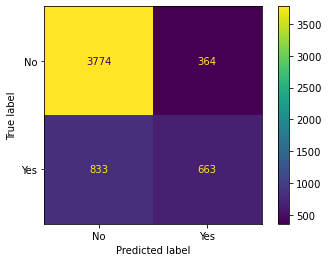



Confusion matrix for the test set
[[959  77]
 [194 179]]


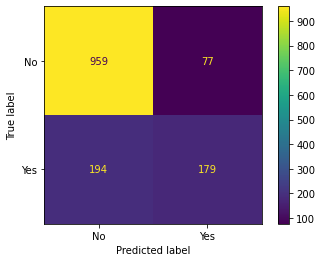

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

log_model.fit(X_train_scaled, y_train)

y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

*Fit a Knn Classifier model on the training data*

In [69]:
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred_train_knn = neigh.predict(X_train_scaled)
y_pred_test_knn  = neigh.predict(X_test_scaled)

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


Confusion matrix for the train set
[[3849  289]
 [ 491 1005]]


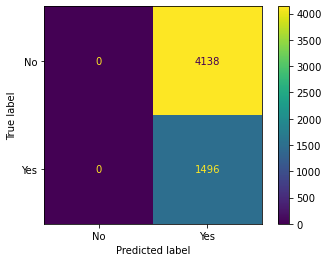



Confusion matrix for the test set
[[887 149]
 [188 185]]


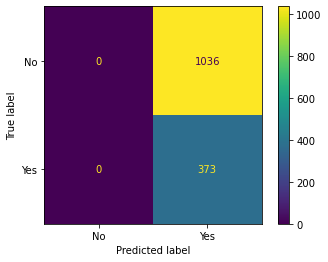

In [71]:
performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_knn, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_knn, pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_knn))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

In [72]:
performance_knn

,Error_metric,Train,Test
0,Accuracy,0.861555,0.760823
1,Precision,0.776662,0.553892
2,Recall,0.671791,0.495979


In [73]:
full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_scaled, y_train)

    models["k"] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train_scaled)
    y_pred_test_knn  = neigh.predict(X_test_scaled)

    performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_knn, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_knn, pos_label='Yes')]})
    
    temp = pd.DataFrame({'k': [k]*3, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Accuracy,0.857827,0.765082
1,2,Precision,0.986014,0.616667
2,2,Recall,0.471257,0.297587
0,3,Accuracy,0.861555,0.760823
1,3,Precision,0.776662,0.553892
2,3,Recall,0.671791,0.495979
0,4,Accuracy,0.834753,0.775727
1,4,Precision,0.828107,0.623377
2,4,Recall,0.476604,0.386059
0,5,Accuracy,0.837061,0.776437


In [74]:
models

{'k': [20, KNeighborsClassifier(n_neighbors=20)]}

In [75]:
full[full['Error_metric'] == 'Accuracy']

,k,Error_metric,Train,Test
0,2,Accuracy,0.857827,0.765082
0,3,Accuracy,0.861555,0.760823
0,4,Accuracy,0.834753,0.775727
0,5,Accuracy,0.837061,0.776437
0,6,Accuracy,0.829251,0.789212
0,7,Accuracy,0.824636,0.786373
0,8,Accuracy,0.818246,0.781405
0,9,Accuracy,0.818424,0.787793
0,10,Accuracy,0.815051,0.787083
0,11,Accuracy,0.811857,0.788502


In [76]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Accuracy,Train,0.857827
1,2,Precision,Train,0.986014
2,2,Recall,Train,0.471257
3,3,Accuracy,Train,0.861555
4,3,Precision,Train,0.776662
5,3,Recall,Train,0.671791
6,4,Accuracy,Train,0.834753
7,4,Precision,Train,0.828107
8,4,Recall,Train,0.476604
9,5,Accuracy,Train,0.837061


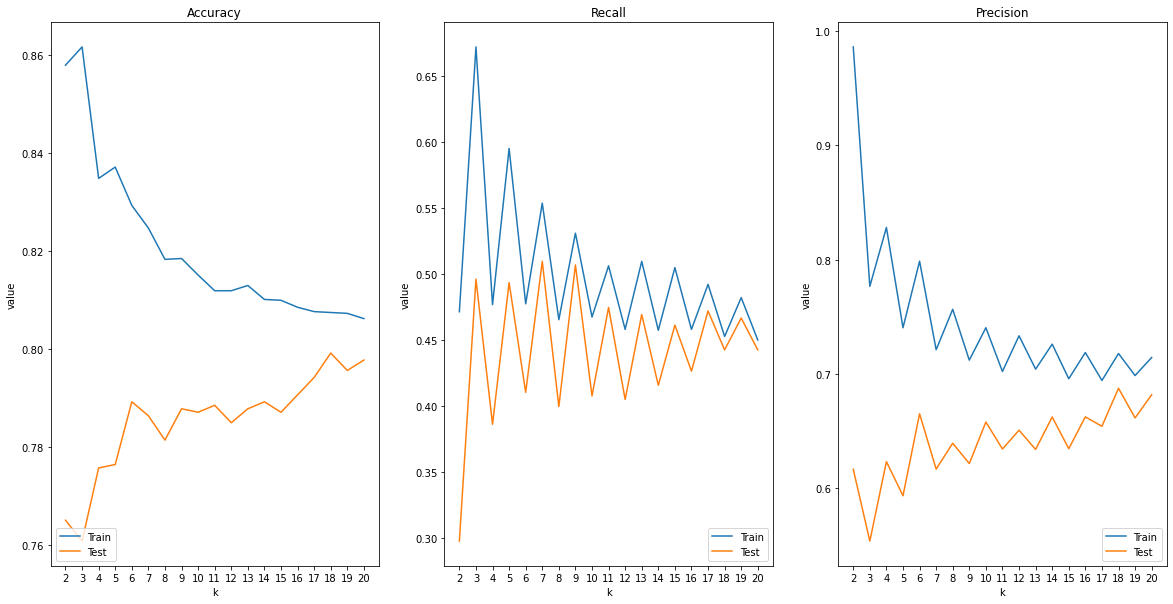

In [77]:
fig, ax = plt.subplots(1,3, figsize=(20,10))

sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Accuracy'], hue = 'variable', ax = ax[0])
ax[0].set_xticks(range(2,21))
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower left')

sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Recall'], hue = 'variable', ax = ax[1])
ax[1].set_xticks(range(2,21))
ax[1].set_title("Recall")
ax[1].legend(loc='lower right')

sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Precision'], hue = 'variable', ax = ax[2])
ax[2].set_xticks(range(2,21))
ax[2].set_title("Precision")
ax[2].legend(loc='lower right')

## Fit a Decision Tree Classifier on the training data.

In [78]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


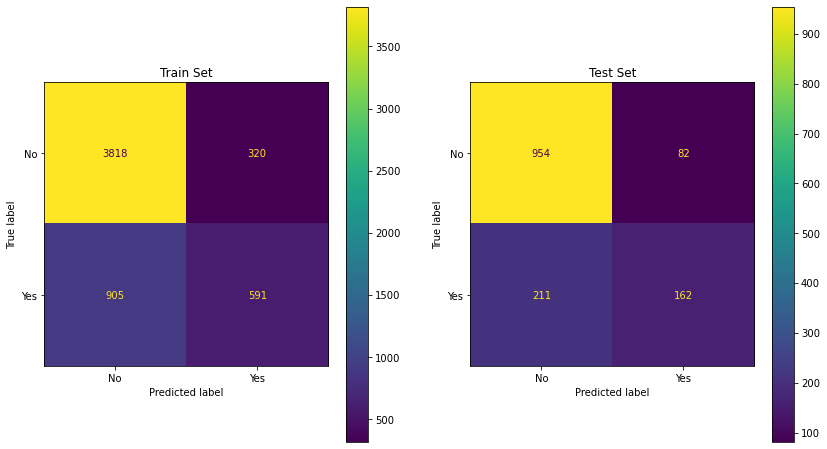

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix



# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label= 'Yes'),
                                         recall_score(y_train, y_pred_train_dt, pos_label= 'Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label= 'Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label= 'Yes')]})


display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

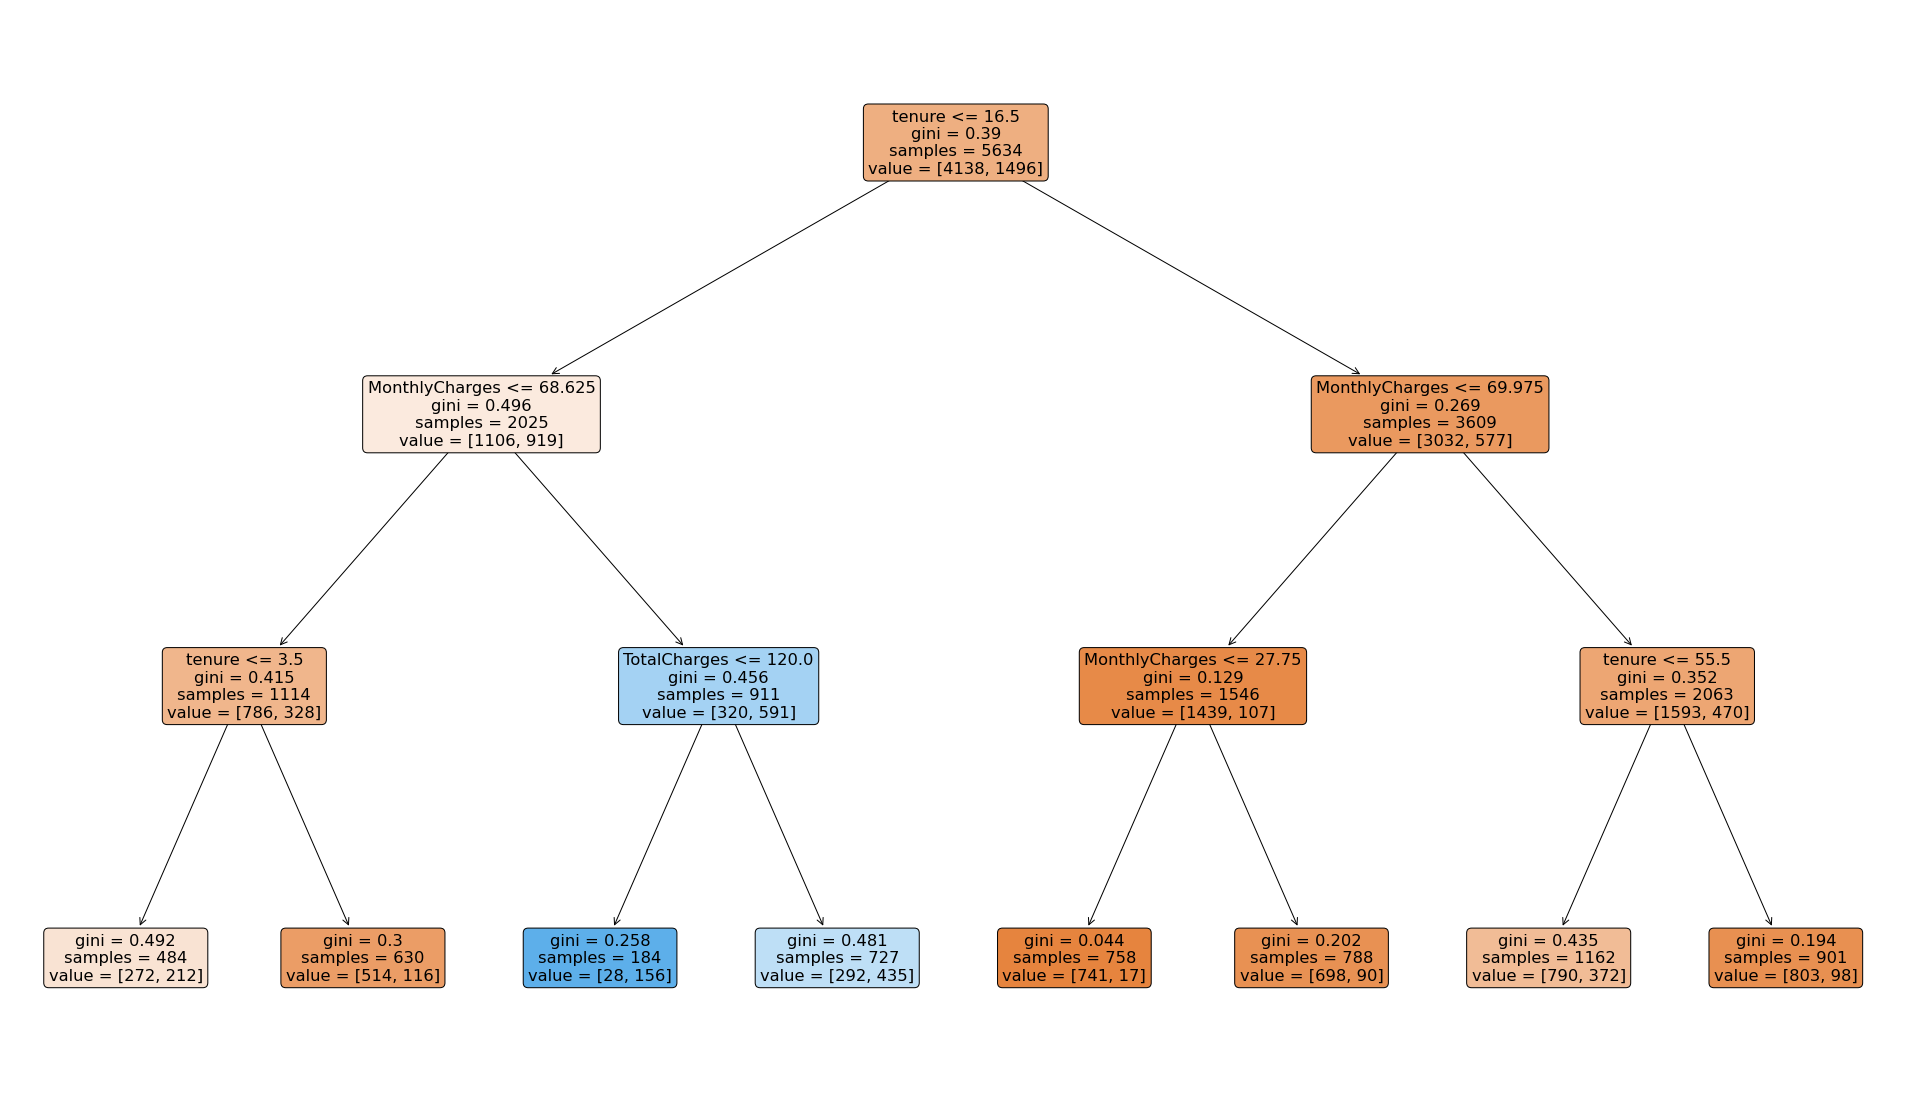

In [80]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

## Apply K-fold Cross Validation on your models before and check the model score. 

In [81]:
print(X_train.shape)
print(X_test.shape)

(5634, 4)
(1409, 4)


In [82]:
scores=cross_val_score(dt, X_train, y_train, cv=10)
scores

array([0.7641844 , 0.80141844, 0.7712766 , 0.80319149, 0.75843694,
       0.77264654, 0.78507993, 0.78330373, 0.76731794, 0.79218472])

In [83]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.01


In [84]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.7192046978649365, 'Linear Regression': 0.7875383963145841, 'KNN': 0.7630445026879389}


## Check for Imbalance 

*When there is an imbalance in the data, the training model will spend most of its time on negative examples and not learn enough from positive ones. For exaple, the cases of fraud are always going to be way less than the cases of no fraud.*

**The methods to check imbalanced data are:**
+ **Downsampling:** *means training on a disproportionately low subset of the majority class examples.*
+ **Upsampling:** *means adding an example weight to the downsampled class equal to the factor by which you downsampled.*
+ **Upsampling SMOTE**
+ **Downsampling Tomeklinks**

*First, check if our data is imbalanced*

In [85]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [86]:
5174/len(churnData['Churn'])

0.7346301292063041

*Downsampling*

In [87]:
category_no = churnData[churnData['Churn'] == 'No']
category_yes = churnData[churnData['Churn'] == 'Yes']

In [88]:
print(category_no.shape)
print(category_yes.shape)

(5174, 16)
(1869, 16)


In [89]:
category_no_down = category_no.sample(len(category_yes))
print(category_no_down.shape)
print(category_yes.shape)

(1869, 16)
(1869, 16)


In [90]:
new_data_down= pd.concat([category_no_down, category_yes], axis=0)
new_data_down

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
1584,Female,1,No,No,65,No,No,Yes,Yes,No,Yes,Yes,Two year,53.50,3517.90,No
4557,Male,0,No,No,53,No,No,No,Yes,Yes,Yes,Yes,One year,54.90,3045.75,No
4905,Female,0,Yes,Yes,58,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,1158.85,No
5169,Male,0,No,Yes,15,Yes,Yes,No,Yes,No,No,Yes,One year,64.85,950.75,No
6733,Male,0,No,No,27,Yes,Yes,No,No,No,No,No,Month-to-month,50.35,1411.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,Yes


In [91]:
#shuffling the data
new_data_down = new_data_down.sample(frac=1)
new_data_down['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

*Upsampling*

In [92]:
category_yes_up = category_yes.sample(len(category_no), replace=True) 
print(category_yes_up.shape)

(5174, 16)


In [93]:
category_no.shape

(5174, 16)

In [94]:
new_data_up= pd.concat([category_no, category_yes_up], axis=0)
new_data_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,Female,0,Yes,Yes,21,Yes,No,Yes,No,No,No,No,Month-to-month,74.05,1565.70,Yes
722,Female,0,Yes,Yes,4,Yes,No,No,No,No,No,Yes,Month-to-month,85.95,381.30,Yes
642,Male,0,No,No,1,Yes,No,No,No,No,Yes,Yes,Month-to-month,89.55,89.55,Yes
6660,Male,0,Yes,No,1,Yes,No,No,No,No,No,No,Month-to-month,69.15,69.15,Yes


In [95]:
new_data_up['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

## Fit a Random forest Classifier on the data and compare the accuracy.

In [108]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.843804362429829
